<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/CNN/CNN_transfer_learning_mobilenet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning in image classification
In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand

In [ ]:
!pip install tensorflow_hub first

In [ ]:

import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

[link](https://tfhub.dev/google/imagenet/mobilenet_v2_050_128/classification/5)

### Make predictions using ready made model (without any training)

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

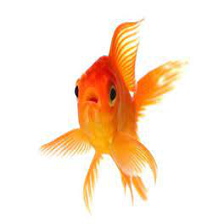

In [ ]:
path = r"/content/drive/MyDrive/Colab/DL/CNN/datasets/"
gold_fish = Image.open(path+"goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:

gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:

gold_fish[np.newaxis, ...]

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open(path+"ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

## Load Flowers Dataset

In [ ]:
import pathlib
path1 = path + 'flower_photos'
print(path1)
data_dir = pathlib.Path(path1)
data_dir

/content/drive/MyDrive/Colab/DL/CNN/datasets/flower_photos


PosixPath('/content/drive/MyDrive/Colab/DL/CNN/datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/Colab/DL/CNN/datasets/flower_photos/tulips/17165583356_38cb1f231d_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/DL/CNN/datasets/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/DL/CNN/datasets/flower_photos/tulips/5208680166_c4372477ef_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/DL/CNN/datasets/flower_photos/tulips/8562853756_73778dac25_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/DL/CNN/datasets/flower_photos/tulips/12949131454_4d3392f4dd_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


## Read flowers images from disk into numpy array using opencv

In [ ]:

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))  # str is used because cv2 not load os path
img.shape

(277, 320, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
# Make prediction using pre-trained model on new flowers dataset
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
X

array([[[[ 26,   2,   5],
         [  6,  13,  11],
         [  7,  11,  10],
         ...,
         [  9,  11,  11],
         [  6,  14,  11],
         [ 23,   2,   5]],

        [[  7,  18,  16],
         [ 72, 120, 113],
         [ 95, 131, 125],
         ...,
         [100, 132, 127],
         [ 72, 118, 110],
         [  7,  18,  16]],

        [[ 15,  22,  21],
         [122, 163, 156],
         [208, 232, 228],
         ...,
         [211, 232, 228],
         [125, 164, 158],
         [ 14,  22,  21]],

        ...,

        [[ 20,  22,  21],
         [119, 161, 154],
         [210, 235, 231],
         ...,
         [213, 235, 231],
         [120, 162, 155],
         [ 20,  22,  21]],

        [[  7,  16,  14],
         [ 66, 113, 105],
         [ 98, 131, 126],
         ...,
         [ 97, 131, 126],
         [ 66, 114, 106],
         [  6,  17,  14]],

        [[ 20,   2,   1],
         [  5,  11,   9],
         [ 11,  11,  10],
         ...,
         [ 10,  11,  10],
        

In [ ]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

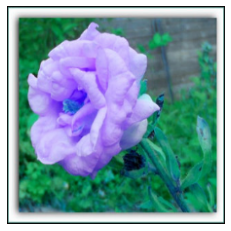

In [ ]:
plt.axis('off')
plt.imshow(X[0])

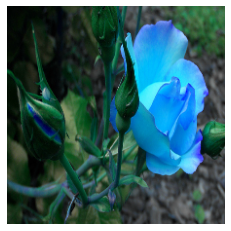

In [ ]:
plt.axis('off')
plt.imshow(X[1])

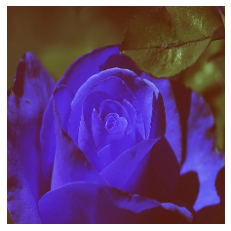

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([550, 795, 722])

In [ ]:
image_labels[795]

'shower curtain'

# Now take pre-trained model and retrain it using flowers images

In [ ]:

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model
                                                    , input_shape=(224, 224, 3)
                                                    , trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
                             pretrained_model_without_top_layer,
                             tf.keras.layers.Dense(num_of_flowers)
                             ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 7s 40ms/step - loss: 0.8133 - acc: 0.7049
Epoch 2/5
86/86 [==============================] - 3s 41ms/step - loss: 0.4178 - acc: 0.8619
Epoch 3/5
86/86 [==============================] - 3s 41ms/step - loss: 0.3323 - acc: 0.8877
Epoch 4/5
86/86 [==============================] - 3s 40ms/step - loss: 0.2717 - acc: 0.9139
Epoch 5/5
86/86 [==============================] - 3s 40ms/step - loss: 0.2332 - acc: 0.9310


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 53ms/step - loss: 0.3764 - acc: 0.8660


[0.3763830363750458, 0.8660130500793457]

In [ ]:
path = r"/content/drive/MyDrive/Colab/DL/CNN/datasets/"
model.save(path+'flower_CNN_TL_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/DL/CNN/datasets/flower_CNN_TL_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/DL/CNN/datasets/flower_CNN_TL_model/assets


In [ ]:
predicted = model.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([3, 1, 0])

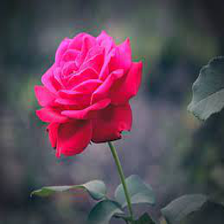

In [ ]:
path = r"/content/drive/MyDrive/Colab/DL/CNN/datasets/"
rose = Image.open(path+"rose11.jpg").resize(IMAGE_SHAPE)
rose

In [ ]:
image = path+"rose11.jpg"

In [ ]:
def readImg(path):
  img = cv2.imread(str(path))
  resized_img = cv2.resize(img,(224,224))
  xtest = np.array([resized_img])
  xtest_scaled = xtest / 255
  return xtest_scaled

In [ ]:
pred = model.predict(xtest_scaled)
pred = np.argmax(pred, axis=1)[0]
pred

0

In [ ]:
def readImg(path):
  img = cv2.imread(str(path))
  resized_img = cv2.resize(img,(224,224))
  xtest = np.array([resized_img])
  xtest_scaled = xtest / 255
  return xtest_scaled
  
def getKey(dct,value):
  return [key for key in dct if (dct[key] == value)][0]

path = r"/content/drive/MyDrive/Colab/DL/CNN/datasets/"
image11 = path+"rose11.jpg"
xtest_scaled = readImg(image11)

pred = model.predict(xtest_scaled)
pred = np.argmax(pred, axis=1)[0]

pred_flower = getKey(flowers_labels_dict, pred)
print("Flower name is ",pred_flower)

Flower name is  roses


In [ ]:
from tensorflow import keras
model_path = r"/content/drive/MyDrive/Colab/DL/CNN/datasets/flower_CNN_TL_model"
model1 = keras.models.load_model(model_path)

In [ ]:
def readImg(path):
  img = cv2.imread(str(path))
  resized_img = cv2.resize(img,(224,224))
  xtest = np.array([resized_img])
  xtest_scaled = xtest / 255
  return xtest_scaled
  
def getKey(dct,value):
  return [key for key in dct if (dct[key] == value)][0]

path = r"/content/drive/MyDrive/Colab/DL/CNN/datasets/"
image11 = r"/content/drive/MyDrive/Colab/DL/CNN/datasets/tulip11.jpg"
xtest_scaled = readImg(image11)

pred = model1.predict(xtest_scaled)
pred = np.argmax(pred, axis=1)[0]

pred_flower = getKey(flowers_labels_dict, pred)
print("Flower name is ",pred_flower)

Flower name is  tulips


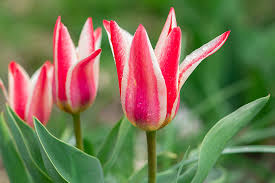

In [ ]:
tulip = Image.open(image11)
tulip